<a href="https://colab.research.google.com/github/up202408837/inform-heart_disease/blob/main/inform_project_december_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:** Heart Disease Analysis

14 Variables; 303 Observations

Reference: Janosi A, Steinbrunn W, Pfisterer M, Detrano R. Heart Disease [dataset]. 1989. UCI Machine Learning Repository. Available from: https://doi.org/10.24432/C52P4X.

**Step 1**: Packages intallations

In [ ]:
!pip install duckdb streamlit matplotlib plotly seaborn pandas numpy
!pip install ucimlrepo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
import duckdb
import plotly.express as px
import seaborn as sns


**Step 2:** Import dataset (https://archive.ics.uci.edu/dataset/45/heart+disease)

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

4. Criar uma tabela com os meus dados

In [ ]:
heart_disease.data.features


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [ ]:
from google.colab import sheets
from google.colab import auth

# Authenticate user to get credentials for accessing Google services.
auth.authenticate_user()

sheet = sheets.InteractiveSheet(df=X)

https://docs.google.com/spreadsheets/d/1AAqqQd6FeSO6xGqEkSL77qiD31o3u9LJ_D2-xeiF6To#gid=0


**Step 2 _ Comments:**
Dataset with 14 variables and 303 observations

Variables description:
1. Age
2. Sex
3. cp = Chest Pain type ( 1:typical angina; 2:atypical angina; 3:non-anginal pain; 4:asymptomatic)
4. trestbp = Blood pressure value at rest on admission to the hospital (in mm Hg)
5. chol = Serum Cholesterol value (in mg/dl)
6. fbs = Fasting blood glucose (>120mg/dl; 1:true; 0:false)
7. restecg = ECG abnormalities at rest (0:normal; 1: ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy (Estes criteria)
8. thalach = Maximum heart rate achieved during stress test
9. exang = Exercise induced angina
10. oldpeak = ST depression induced by exercice relative to rest
11. slope = the slope of the peak exercise ST segment; 1:upsloping; 2:flat; 3:downsloping
12. ca =number o major vessels afected (range 0-3)
13. thal = radionuclid perfusion test; 3: normal; 6: fixed defect; 7: reversable defect
14. num = diagnosis of heart disease according to the angiographic status; 0: < 50% diammeter narrowing; 1: > 50% diammeter narrowing


**Step 3:** Create a presentation of the data in the dataset with visualizations on top of it and showcase them with at least the following requirements:
1. grouping of data
2. filtering data
3. counting data
4. Three different graphical methods (boxplot + heatmap + line plot)
5. show standard deviation or quarter or IQR of columns at some point.
6. Tell a good story
7. OPTIONAL: a linear or logistic model

**Step 3.1:** **grouping** of data in age groups of ten years + **counting** the number of participants in each group

**Step 3.1 _ comments:** data were grouped in intervals of ten years of age; The most frequent group was the one with participants with 50-60 years old, followed by 60-70 years old, as represented in the barplot. There were no participants in the groups with 0-10 years, 10-20 years, 80-90 years and 90-100 years.

In [ ]:
import pandas as pd
df = heart_disease.data.features
df['AgeGroup'] = pd.cut(df['age'], bins=range(0, 101, 10))
age_group_counts = df['AgeGroup'].value_counts().sort_index()

In [ ]:
df['AgeGroup'] = pd.cut(df['age'], bins=range(0, 101, 10))

In [ ]:
age_group_counts = df['AgeGroup'].value_counts().sort_index()

In [ ]:
print(age_group_counts)

AgeGroup
(0, 10]        0
(10, 20]       0
(20, 30]       1
(30, 40]      17
(40, 50]      76
(50, 60]     130
(60, 70]      73
(70, 80]       6
(80, 90]       0
(90, 100]      0
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt


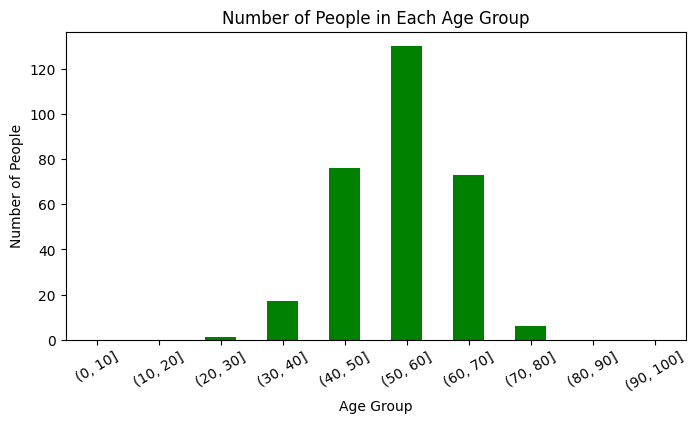

In [ ]:

plt.figure(figsize=(8, 4))
age_group_counts.plot(kind='bar', color='green')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.title('Number of People in Each Age Group')
plt.xticks(rotation=30)
plt.show()

**Step 3.2:** Filtered data to evaluate the its distribuition according to the sex. Six variables were filtered:
a) Cardiovascular risk factors: fasting blood glucose, cholesterol and blood pressure; b) Abnormal parameters suggestive of hear disease: chest pain, abnormal resting ecg and maximum heart rate

**Step 3.2 _ comments:** Data were filtered by sex, to evaluate: a) Chest pain: most participants were aymptomatic. Whithin those who presented chest pain, non-anginal pain was more frequente; b) Fast blood glucose: most patients presented normal values; c) Resting blood pressure: median values were under 140mm Hg in both sex groups d) Resting ECG abnormalities: in the male group, most participants presented left ventricular hypertrophy criteria while in the female group, althougth left ventricular hyperthrophy was common, most participants presented normal ECG at rest; d) Serum total cholesterol: median values were above 200mg/dl in the both groups; e) Maximum heart rate achieved during exercise stress test:mediam values were between 150-160 beats per minute

<ipython-input-27-827c4dfe1628>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].replace({0: 'Female', 1: 'Male'})
<ipython-input-27-827c4dfe1628>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fbs'] = df['fbs'].replace({0: '<120mg/dl', 1: '>120'})
<ipython-input-27-827c4dfe1628>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

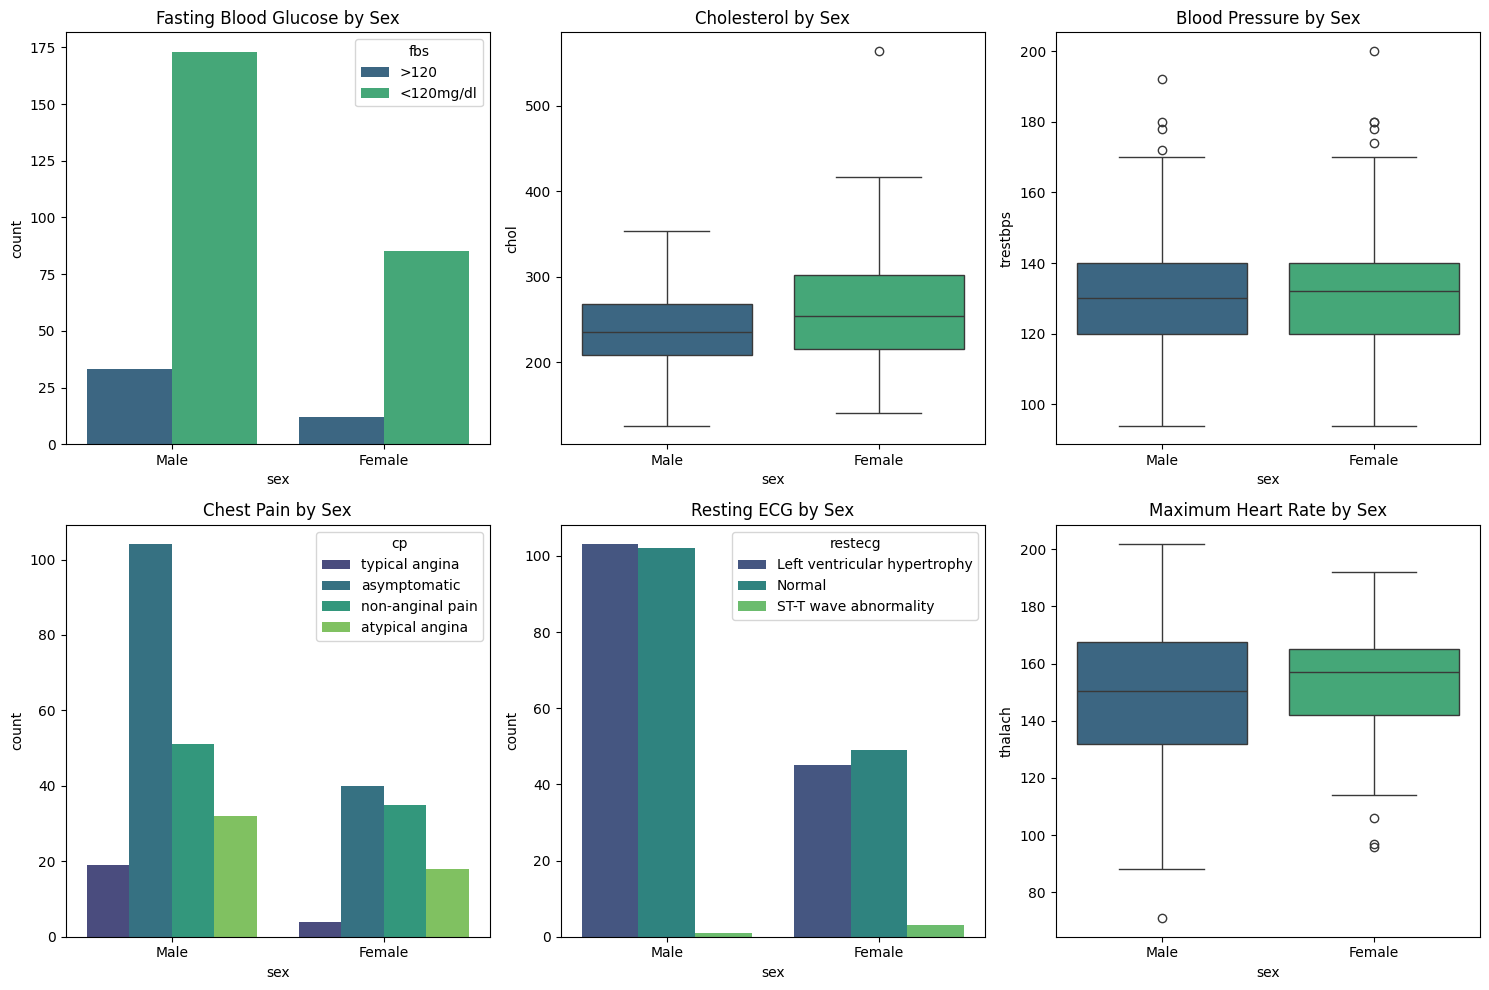

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)
df = heart_disease.data.features

# Replace sex labels in the DataFrame
df['sex'] = df['sex'].replace({0: 'Female', 1: 'Male'})
df['fbs'] = df['fbs'].replace({0: '<120mg/dl', 1: '>120'})
df['restecg'] = df['restecg'].replace({0: 'Normal', 1: 'ST-T wave abnormality', 2: 'Left ventricular hypertrophy'})
df['cp'] = df['cp'].replace({1: 'typical angina', 2: 'atypical angina', 3: 'non-anginal pain', 4: 'asymptomatic'})

# Set a color palette (e.g., 'viridis')
palette = 'viridis'

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust figsize as needed

# Plot Fasting Blood Glucose vs Sex
sns.countplot(x='sex', hue='fbs', data=df, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('Fasting Blood Glucose by Sex')

# Plot Cholesterol vs Sex
sns.boxplot(x='sex', y='chol', data=df, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Cholesterol by Sex')

# Plot Blood Pressure vs Sex
sns.boxplot(x='sex', y='trestbps', data=df, ax=axes[0, 2], palette=palette)
axes[0, 2].set_title('Blood Pressure by Sex')

# Plot Chest Pain vs Sex
sns.countplot(x='sex', hue='cp', data=df, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('Chest Pain by Sex')

# Plot Resting ECG vs Sex
sns.countplot(x='sex', hue='restecg', data=df, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Resting ECG by Sex')

# Plot Maximum Heart Rate vs Sex
sns.boxplot(x='sex', y='thalach', data=df, ax=axes[1, 2], palette=palette)
axes[1, 2].set_title('Maximum Heart Rate by Sex')

# Adjust layout
plt.tight_layout()
plt.show()

**Step 3.3:** Heatmaps of serum cholesterol, blood pressure and maximum heart rate achieved at exercise stress test by age group and sex.

**Step 3.3 _ comments:** a) serum cholesterol values were higher in the male group at 70-80 years old and lower in the youger groups for both sex; b) resting blood pressure was higher in the female group at 60-70 years old; c) Older participants achieved lower heart rate values during exercise stress test.

<ipython-input-25-aa1598a2ebc9>:29: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data1 = pd.pivot_table(df, index='AgeGroup', columns='sex', values='chol', aggfunc='mean')
<ipython-input-25-aa1598a2ebc9>:37: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data2 = pd.pivot_table(df, index='AgeGroup', columns='sex', values='trestbps', aggfunc='mean')
<ipython-input-25-aa1598a2ebc9>:45: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data3 = pd.pivot_table(df, index='AgeGroup', columns

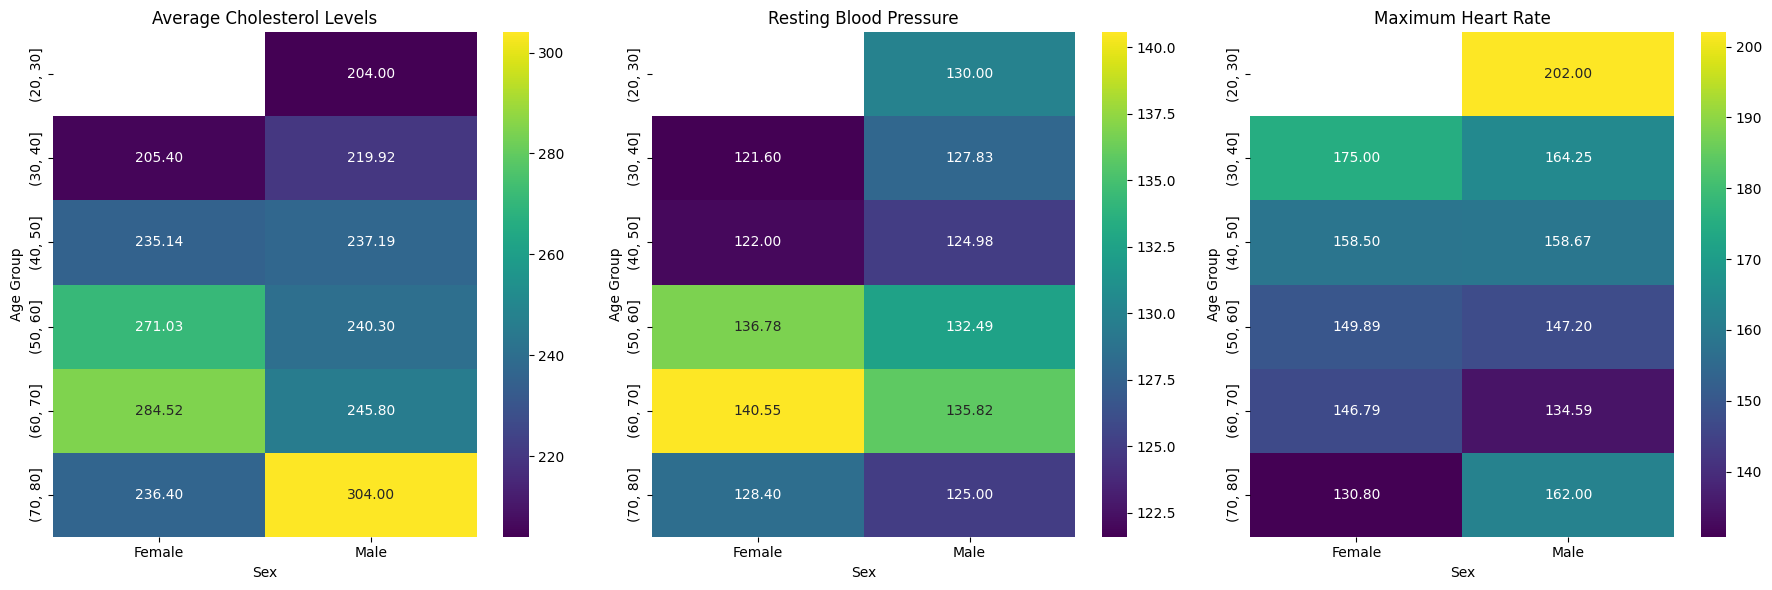

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)
# Get features and targets
X = heart_disease.data.features
y = heart_disease.data.targets

# Rename the target column to 'target' if it's not already
y = y.rename(columns={y.columns[0]: 'target'})

# Merge features and target
df = pd.concat([X, y], axis=1)

# Ensure 'AgeGroup' column is present in the DataFrame
if 'AgeGroup' not in df.columns:
    df['AgeGroup'] = pd.cut(df['age'], bins=range(0, 101, 10))

# Replace sex labels
df['sex'] = df['sex'].replace({0: 'Female', 1: 'Male'})

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Heatmap 1: Average Cholesterol Levels
heatmap_data1 = pd.pivot_table(df, index='AgeGroup', columns='sex', values='chol', aggfunc='mean')
heatmap_data1 = heatmap_data1.sort_index()
sns.heatmap(heatmap_data1, annot=True, cmap='viridis', fmt=".2f", ax=axes[0])
axes[0].set_title('Average Cholesterol Levels')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Age Group')

# Heatmap 2: Resting Blood Pressure
heatmap_data2 = pd.pivot_table(df, index='AgeGroup', columns='sex', values='trestbps', aggfunc='mean')
heatmap_data2 = heatmap_data2.sort_index()
sns.heatmap(heatmap_data2, annot=True, cmap='viridis', fmt=".2f", ax=axes[1])
axes[1].set_title('Resting Blood Pressure')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Age Group')

# Heatmap 3: Maximum Heart Rate
heatmap_data3 = pd.pivot_table(df, index='AgeGroup', columns='sex', values='thalach', aggfunc='mean')
heatmap_data3 = heatmap_data3.sort_index()
sns.heatmap(heatmap_data3, annot=True, cmap='viridis', fmt=".2f", ax=axes[2])
axes[2].set_title('Maximum Heart Rate')
axes[2].set_xlabel('Sex')
axes[2].set_ylabel('Age Group')

# Adjust layout
plt.tight_layout()
plt.show()


**Step 3.4 Linear logistic regression** of maximum heart rate achieved during exercise stress test according to the age of the participants.

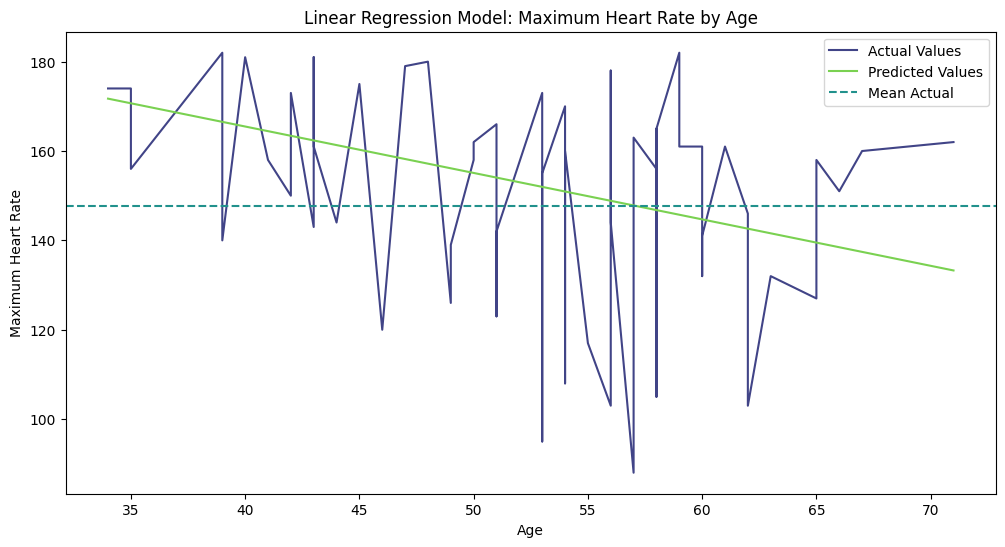

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features[['age']]  # Select age as the feature
y = heart_disease.data.features['thalach']  # Target variable: maximum heart rate

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values for the test set
y_pred = model.predict(X_test)

# Create a line plot of actual and predicted values with mean lines
plt.figure(figsize=(12, 6))

# Sort the test data by age for a better line plot
sorted_indices = np.argsort(X_test['age'].values)
X_test_sorted = X_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.plot(X_test_sorted['age'], y_test_sorted, label='Actual Values', color=plt.cm.viridis(0.2))
plt.plot(X_test_sorted['age'], y_pred_sorted, label='Predicted Values', color=plt.cm.viridis(0.8))

mean_actual = np.mean(y_test)
plt.axhline(y=mean_actual, color=plt.cm.viridis(0.5), linestyle='--', label='Mean Actual')

plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.title('Linear Regression Model: Maximum Heart Rate by Age')
plt.legend()

# Calculate and plot mean lines (optional, might be less informative in this case)
# mean_actual = np.mean(y_test)
# mean_predicted = np.mean(y_pred)
# plt.